# Giới thiệu Tensorflow

References: 

* https://www.tensorflow.org/
* https://www.datacamp.com/community/tutorials/tensorflow-tutorial

TensorFlow is a general-purpose system for graph-based computation.

TensorFlow gets its name from tensors, which are arrays of arbitrary dimensionality. A vector is a 1-d array and is known as a 1st-order tensor. A matrix is a 2-d array and a 2nd-order tensor. The "flow" part of the name refers to computation flowing through a graph. Training and inference in a neural network, for example, involves the propagation of matrix computations through many nodes in a computational graph.

When you think of doing things in TensorFlow, you might want to think of creating tensors (like matrices), adding operations (that output other tensors), and then executing the computation (running the computational graph). In particular, it's important to realize that when you add an operation on tensors, **it doesn't execute immediately**. Rather, TensorFlow waits for you to define all the operations you want to perform. Then, TensorFlow optimizes the computation graph, deciding how to execute the computation, before generating the data. Because of this, a tensor in TensorFlow isn't so much holding the data as a placeholder for holding the data, waiting for the data to arrive when a computation is executed."

In [ ]:
from __future__ import print_function

import numpy as np
import tensorflow as tf

Add two vectors

In [ ]:
with tf.Session():
    input1 = tf.constant([1.0, 1.0, 1.0, 1.0])
    input2 = tf.constant([2.0, 2.0, 2.0, 2.0])
    output = tf.add(input1, input2)
    print('output:', output)
    result = output.eval()
    print("result: ", result)

In [ ]:
print([x + y for x, y in zip([1.0] * 4, [2.0] * 4)])

In [ ]:
x, y = np.full(4, 1.0), np.full(4, 2.0)
print("{} + {} = {}".format(x, y, x + y))

Broadcast multiply

In [ ]:
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)
print(result)

# TODO student add code to see result value
# print(result.numpy()) # Đối với tensorflow 2.x
print(result.eval(session = tf.Session())) # Đối với tensorflow 1.x

Many operators

In [ ]:
with tf.Session():
    input1 = tf.constant(1.0, shape=[4])
    input2 = tf.constant(2.0, shape=[4])
    input3 = tf.constant(3.0, shape=[4])
    output = tf.add(tf.add(input1, input2), input3)
    result = output.eval()
    print(result)

Override operator

In [ ]:
with tf.Session():
    input1 = tf.constant(1.0, shape=[4])
    input2 = tf.constant(2.0, shape=[4])
    output = input1 + input2
    print(output.eval())

Ngoài eval(), chúng ta thường dùng session.run() để thực hiện việc tính toán các giá trị của tensor, với tensor *output* ở trên chúng ta có thể tính giá trị như dưới.

In [ ]:
with tf.Session() as sess:
    result = sess.run(output)
    print(result)

In [ ]:
with tf.Session():
    input_features = tf.constant(np.reshape([1, 0, 0, 1], (1, 4)).astype(np.float32))
    weights = tf.constant(np.random.randn(4, 2).astype(np.float32))
    output = tf.matmul(input_features, weights)
    print("Input:")
    print(input_features.eval())
    print("Weights:")
    print(weights.eval())
    print("Output:")
    print(output.eval())

**Làm quen với khái niệm**:

Sinh viên đọc và chú ý phân biệt ý nghĩa sử dụng của chúng:

* https://www.tensorflow.org/api_docs/python/tf/placeholder

* https://www.tensorflow.org/api_docs/python/tf/Variable

Placeholder example

In [ ]:
x = tf.placeholder(tf.float32, shape = (1024, 1024))
y = tf.matmul(x, x)

with tf.Session() as sess:
  print(sess.run(y))  # ERROR: will fail because x was not fed.

  rand_array = np.random.rand(1024, 1024)
  print(sess.run(y, feed_dict = {x: rand_array}))  # Will succeed.

Variables: https://www.tensorflow.org/programmers_guide/variables

In [ ]:
# run this 2 times may cause error: Variable v already exists
with tf.Session() as sess:
    v = tf.get_variable("v", shape=(), initializer = tf.zeros_initializer())
    assignment = v.assign_add(1)
    tf.global_variables_initializer().run()
    print(assignment.eval())

In [ ]:
#@test {"output": "ignore"}
import tensorflow as tf
import numpy as np

with tf.Session() as sess:
    # Set up two variables, total and weights, that we'll change repeatedly.
    total = tf.Variable(tf.zeros([1, 2]))
    weights = tf.Variable(tf.random_uniform([1,2]))

    # Initialize the variables we defined above.
    tf.global_variables_initializer().run()

    # This only adds the operators to the graph right now. The assignment
    # and addition operations are not performed yet.
    update_weights = tf.assign(weights, tf.random_uniform([1, 2], -1.0, 1.0))
    update_total = tf.assign(total, tf.add(total, weights))
  
    for _ in range(5):
        # Actually run the operation graph, so randomly generate weights and then
        # add them into the total. Order does matter here. We need to update
        # the weights before updating the total.
        sess.run(update_weights)
        sess.run(update_total)
    
        print(weights.eval(), total.eval())

Linear Regression Example from: [aymericdamien](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/linear_regression.ipynb)

In [ ]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [ ]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [ ]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [ ]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [ ]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [ ]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), 
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

**Tensorflow arithmetic operators**

https://www.tensorflow.org/api_guides/python/math_ops#Arithmetic_Operators

## Bài tập

Bài nộp của sinh viên là chính là **file này** sau khi được đổi tên thành **MSSV.E9_introduction_numpy.ipynb** và đừng quên ghi thông tin sinh viên vào các ô ở dưới.

Địa chỉ nộp bài: https://www.dropbox.com/request/h084jC1ZUTkUm5gosR6l

Deadline nộp bài: **10:00 thứ 2 tuần tiếp theo**

*Điểm bài này sẽ được tổng hợp với điểm chấm trên lớp (nếu có) để ra điểm cuối cùng*

Thông tin sinh viên:

In [1]:
sid = '2013452'
name = 'Đào Quốc Khánh'

import tensorflow.compat.v1 as tf
import numpy as np

# sinh viên import các thư viện cần thiết ở đây
import matplotlib.pyplot as plt
import time

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Bài 1
Trong bài này, sinh viên sẽ tập làm quen với các thao tác cơ bản trên numpy, tensorflow, so sánh, đánh giá đơn giản về tốc độ tính toán

a) Sinh viên viết hàm matrix_gen(m, n) để sinh ra ma trận các số thực trong khoảng [0, 1] ngẫu nhiên, output là python array biểu diễn cho ma trận. Sử dụng hàm để sinh ra hai ma trận và lưu vào hai biến tương ứng đã cho để sử dụng cho các câu tiếp theo.

In [4]:
# code sinh viên cho câu a
def matrix_gen(m, n):
    return np.random.random((m, n))

m, n, k = 50, 40, 60
matrix_mn = matrix_gen(m, n)
matrix_nk = matrix_gen(n, k)

b) Hãy viết một hàm py_matrix_mul(matrix_1, matrix_2) để nhân hai ma trận được truyền vào trong đó không sử dụng numpy, tensorflow hay các thư viện khác. (giả sử input đã đúng không cần kiểm tra

In [10]:
# code câu b của sinh viên
def py_matrix_mul(matrix_1, matrix_2):
    (m1, n1), (m2, n2) = matrix_1.shape, matrix_2.shape
    if n1 != m2:
        print("Invalid!")
        return
    ans = np.zeros((m1, n2))
    for i in range(m1):
        for j in range(n2):
            for k in range(n1):
                ans[i, j] += matrix_1[i][k] * matrix_2[k][j]
    return ans

start = time.time()

mt_mul_py = py_matrix_mul(matrix_mn, matrix_nk)
print(mt_mul_py)

end = time.time()
t = (end - start) * 1000
print('Execution time:', t, 'ms')

[[10.04333602  9.72346676  9.15356217 ... 10.50313196  9.62077836
   9.57575014]
 [ 9.6920086   9.91145759 10.29937932 ...  9.92578066 10.06694413
   9.08905957]
 [10.046891    9.98816286 10.22190643 ... 11.29951049  9.96448027
  10.53370855]
 ...
 [10.35551496  9.65445662 11.02806932 ... 12.18337968 11.08790012
  11.06962025]
 [ 9.40223453  9.07298176  9.20582547 ... 10.47146149  8.10587498
   8.82366764]
 [ 7.69268204  8.39625549  8.25929436 ...  9.50640296  8.31740685
   7.67092169]]
Execution time: 84.86819267272949 ms


c) Sử dụng numpy để hiện thực cho bài toán nhân hai ma trận với hai ma trân *matrix_mn* và *matrix_nk*, lưu kết quả cuối cùng vào mt_mul_numpy

In [11]:
# code câu c của sinh viên
start = time.time()

mt_mul_numpy = np.dot(matrix_mn, matrix_nk)
print(mt_mul_numpy)

end = time.time()
t = (end - start) * 1000
print('Execution time:', t, 'ms')

[[10.04333602  9.72346676  9.15356217 ... 10.50313196  9.62077836
   9.57575014]
 [ 9.6920086   9.91145759 10.29937932 ...  9.92578066 10.06694413
   9.08905957]
 [10.046891    9.98816286 10.22190643 ... 11.29951049  9.96448027
  10.53370855]
 ...
 [10.35551496  9.65445662 11.02806932 ... 12.18337968 11.08790012
  11.06962025]
 [ 9.40223453  9.07298176  9.20582547 ... 10.47146149  8.10587498
   8.82366764]
 [ 7.69268204  8.39625549  8.25929436 ...  9.50640296  8.31740685
   7.67092169]]
Execution time: 0.99945068359375 ms


d) Sử dụng tensorflow để hiện thực cho câu c thay vì dùng numpy

In [13]:
# code câu d của sinh viên
start = time.time()

mt_mul_tensorflow = tf.matmul(matrix_mn, matrix_nk).eval(session = tf.Session())
print(mt_mul_tensorflow)

end = time.time()
t = (end - start) * 1000
print('Execution time:', t, 'ms')

[[10.04333602  9.72346676  9.15356217 ... 10.50313196  9.62077836
   9.57575014]
 [ 9.6920086   9.91145759 10.29937932 ...  9.92578066 10.06694413
   9.08905957]
 [10.046891    9.98816286 10.22190643 ... 11.29951049  9.96448027
  10.53370855]
 ...
 [10.35551496  9.65445662 11.02806932 ... 12.18337968 11.08790012
  11.06962025]
 [ 9.40223453  9.07298176  9.20582547 ... 10.47146149  8.10587498
   8.82366764]
 [ 7.69268204  8.39625549  8.25929436 ...  9.50640296  8.31740685
   7.67092169]]
Execution time: 7.72857666015625 ms


e) Với các câu b, c, d, hãy chèn đoạn code để tính thời gian thực thi của mỗi phương pháp và so sánh, đánh giá về mặt thời gian thực thi của các thao tác.

Nhận xét của sinh viên: Sau khi chạy thử và tính toán thời gian thực thi của từng phương pháp, ta có được:

    - Sử dụng hàm tự viết py_matrix_mul: xấp xỉ 145 - 160 (ms)
    
    - Sử dụng np.dot trong numpy: xấp xỉ 1 - 2 (ms)
    
    - Sử dụng tf.matmul (bao gồm cả thao tác chuyển đổi kết quả từ Tensor về np.array): xấp xỉ 20 - 24 (ms)
    
    - Sử dụng tf.matmul (không bao gồm cả thao tác chuyển đổi kết quả từ Tensor về np.array): xấp xỉ 2 - 8 (ms)
    
Từ đó ta nhận thấy được, việc sử dụng các hàm tích hợp sẵn trong numpy hoặc tensorflow hiệu quả hơn gấp nhiều lần đối với hàm chúng ta tự viết để nhân hai ma trận - O(n^3). Trong đó, việc sử dụng numpy.dot có hiệu quả hơn hẳn so với 2 phương pháp còn lại.

### Bài 2

Cho đoạn code sinh dữ liệu cho hàm f() như bên dưới.
Sinh viên hãy chỉnh sửa đoạn code Linear Regression, 
chọn các tham số phù hợp để ra được kết quả tốt nhất có thể.

In [5]:
def f(x):
    return x * 5 + 3

llen = 50
x = np.random.rand(llen)
y = f(x) + np.random.normal(0, 0.1, llen)

print('x', x)
print('y', y)

train_X = x
train_Y = y
n_samples = train_X.shape[0]

x [0.51438488 0.52173564 0.29836453 0.39201767 0.65906791 0.14205105
 0.02838277 0.1843252  0.58105676 0.49623616 0.38848509 0.05374833
 0.31764084 0.68044831 0.99413022 0.13253451 0.72523097 0.7789529
 0.51816774 0.02095499 0.39198117 0.32096096 0.03429861 0.88842294
 0.85317734 0.97020148 0.9393118  0.15204845 0.23025061 0.92494352
 0.71026449 0.64030493 0.69698969 0.03997689 0.29734708 0.73587795
 0.2432251  0.90528843 0.6460306  0.0827737  0.27396939 0.46808267
 0.85837567 0.83024922 0.33940421 0.18034504 0.50946854 0.83071489
 0.02823792 0.83841541]
y [5.6360219  5.667278   4.58739761 4.84265372 6.33054473 3.79517611
 2.99799758 3.79220285 5.89514491 5.44998076 4.77352392 3.3544446
 4.63095371 6.51447909 7.99461694 3.47995364 6.63574736 6.79968687
 5.64735851 3.16059198 5.14251932 4.56874879 3.03550788 7.42335356
 7.06912619 7.83697853 7.72426609 3.74803701 4.2054116  7.46822762
 6.4745641  6.05790465 6.27045933 3.21181662 4.52659008 6.72005464
 4.19982821 7.5544282  6.21262087 3.

*Code sinh viên ở dưới*

Optimization Finished!
Training cost = 0.0042992835 W = 4.9788527  b= 2.9789388 



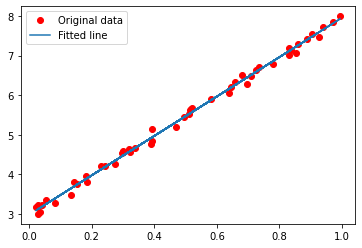

Execution time: 0.7749361991882324 s


In [6]:
# TODO
# Parameters
learning_rate = 10
training_epochs = 60
display_step = 100

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name = "weight")
b = tf.Variable(np.random.randn(), name = "bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples)
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
start = time.time()

with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost =", "{:.9f}".format(c), 
                "W =", sess.run(W), "b =", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost =", training_cost, "W =", sess.run(W), " b=", sess.run(b), '\n')
    
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
end = time.time()
t = (end - start)
print('Execution time:', t, 's')

*Những nhận xét đánh giá của sinh viên*:

Sau khi chạy thử và tính toán thời gian thực thi với nhiều bộ số Learning rate và Epoch, ta có các kết quả tiêu biểu về thời gian thực thi và tính phù hợp của mô hình như sau:

    - Learning rate: 0.01, Epoch: 1000 --> 28.91 s, fit không tốt
    
    - Learning rate: 0.01, Epoch: 1300 --> 34.51 s, fit không tốt
    
    - Learning rate: 0.01, Epoch: 1700 --> 53.35 s, fit không tốt
    
    - Learning rate: 0.1, Epoch: 1000 --> 24.03 s, fit tốt
    
    - Learning rate: 0.5, Epoch: 1000 --> 22.01 s, fit tốt
    
    - Learning rate: 1, Epoch: 1000 --> 25.17 s, fit tốt
    
    - Learning rate: 2, Epoch: 200 --> 6.16 s, fit tốt
    
    - Learning rate: 8, Epoch: 100 --> 2.35 s, fit tốt
    
    - Learning rate: 10, Epoch: 60 --> 2.12 s, fit tốt
    
    
Với bộ số Learning rate = 10 và Epoch = 60, nếu chúng ta tiếp tục từ từ tăng Learning rate và giảm Epoch, các kết quả thu được (về cả thời gian thực thi và mức độ phù hợp của mô hình) đa phần sẽ không khác biệt nhiều lắm với kết quả thu được hiện tại (tuy nhiên không tăng Learning rate quá mức hay giảm Epoch quá nhỏ vì khi đó thuật toán Gradient Descent sẽ thực hiện không chính xác, không tìm được cực tiểu cũng như không xác định được mô hình).

Vậy có thể kết luận bộ tham số Learning rate = 10 và Epoch = 60 có thể được coi là một trong những bộ tham số cho ra kết quả "gần như" là tốt nhất.